# RESTAURANT DATA ANALYSIS

### OBJECTIVE:

To analyse the timings, peak hours of the restaurant, number of people visiting the restaurant on the basis of tips, days, time etc. Give a pictorial representations of the above values on graph co-ordinates

### APPROACH:

Using pandas, numpy and matplotlib we can split the data according to our liking and finding if any NaN values are present and replacing such values. Also we can then plot the bar graph or box plot of the above data.

### DELIVERABLES:

1. csv: tips.csv
2. box plot: boxplot grouped by day & tip
3. bar plot: barplot of day vs tips

In [9]:
import pandas 
import numpy as np

In [10]:
data=pd.read_csv('tips.csv',sep=',',encoding='latin_1') # read csv file (filepath,separator generally',',encoding standard which here is west europe)
data # print out data variable

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [21]:
data.loc[(data["sex"]=="Female")&(data["smoker"]=="No")&(data["day"]=="Sun")&(data["time"]=="Dinner"),["sex","smoker","time","day"]] 
# Separating the data by taking female, no smoking, sunday and dinner from original data using boolean indexing method.

,sex,smoker,time,day
0,Female,No,Dinner,Sun
4,Female,No,Dinner,Sun
11,Female,No,Dinner,Sun
14,Female,No,Dinner,Sun
16,Female,No,Dinner,Sun
18,Female,No,Dinner,Sun
51,Female,No,Dinner,Sun
52,Female,No,Dinner,Sun
114,Female,No,Dinner,Sun
115,Female,No,Dinner,Sun


In [23]:
# for female data
def num_missing(x): # Checking missing values
    return sum(x.isnull())

print "Missing Values per Columns:"
print data.apply(num_missing, axis=0) # apply returns some value after passing each column(axis=0 i.e. column) of adata frame with some function(i.e. missing values here)

print "Missing Values per Rows:"
print data.apply(num_missing, axis=1).head() # axis=1 means rows

Missing Values per Columns:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Missing Values per Rows:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [24]:
data.loc[(data["sex"]=="Male")&(data["smoker"]=="No")&(data["day"]=="Sun")&(data["time"]=="Dinner"),["sex","smoker","time","day"]]
# Separating the data by taking male, no smoking, sunday and dinner from original data using boolean indexing method

,sex,smoker,time,day
1,Male,No,Dinner,Sun
2,Male,No,Dinner,Sun
3,Male,No,Dinner,Sun
5,Male,No,Dinner,Sun
6,Male,No,Dinner,Sun
7,Male,No,Dinner,Sun
8,Male,No,Dinner,Sun
9,Male,No,Dinner,Sun
10,Male,No,Dinner,Sun
12,Male,No,Dinner,Sun


In [26]:
# for male data
def num_missing(x):
    return sum(x.isnull())

print "Missing Values per Columns For Male:"
print data.apply(num_missing, axis=0)

print "Missing Values per Rows For Male:"
print data.apply(num_missing, axis=1).head()

Missing Values per Columns For Male:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Missing Values per Rows For Male:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [27]:
# determine pivot table
impute_grps=data.pivot_table(values=["tip"], index=["sex","smoker","time","day"], aggfunc=np.mean)
# using pandas we can create MS Excel style pivot tables. for instance a key column is 'tip' which will be imputed using mean amount of each sex, smoker, time and day. 
print impute_grps

                                tip
sex    smoker time   day           
Female No     Dinner Fri   3.250000
                     Sat   2.724615
                     Sun   3.329286
                     Thur  3.000000
              Lunch  Fri   3.000000
                     Thur  2.437083
       Yes    Dinner Fri   2.700000
                     Sat   2.868667
                     Sun   3.500000
              Lunch  Fri   2.660000
                     Thur  2.990000
Male   No     Dinner Fri   2.500000
                     Sat   3.256563
                     Sun   3.115349
              Lunch  Thur  2.941500
       Yes    Dinner Fri   3.246000
                     Sat   2.879259
                     Sun   3.521333
              Lunch  Fri   1.900000
                     Thur  3.058000


In [28]:
# sorting data
data_sort=data.sort_values(['tip','total_bill'], ascending=False) 
# pandas allow easy sorting based on multiple columns.
data_sort[['tip','total_bill']].head(10) # .head(10) will only take 10 values to diplay

,tip,total_bill
170,10.00,50.81
212,9.00,48.33
23,7.58,39.42
59,6.73,48.27
141,6.70,34.30
214,6.50,28.17
183,6.50,23.17
47,6.00,32.40
239,5.92,29.03
88,5.85,24.71


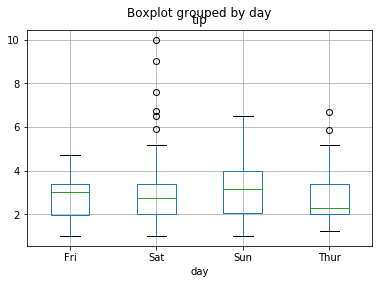

In [31]:
#plotting boxplot
import matplotlib.pyplot as plt
data.boxplot(column="tip",by="day")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x086C7F50>,
      dtype=object)

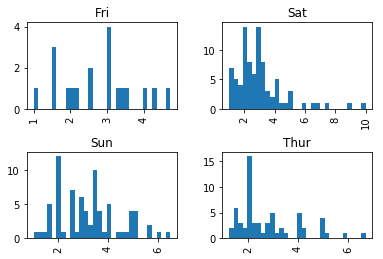

In [32]:
# plotting histogram
data.hist(column="tip",by="day",bins=30)

                                                                                       DONE BY: SOURABH SHRIPAD NAIK